# LinearRegression,SGDRegression,Ridge,Lasso for Boston Prediction

## Preprocese data

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

In [234]:
data = load_boston()
data_pd = pd.DataFrame(data.data,columns=data.feature_names)
data_pd['price'] = data.target

In [235]:
# 查看空值
data_pd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [236]:
# 查看数据大小
data_pd.shape

(506, 14)

In [237]:
# 查看数据描述
data_pd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [238]:
# 显示数据前5行
data_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Coefficient relation

In [239]:
#计算相关系数
data_pd.corr()['price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
price      1.000000
Name: price, dtype: float64

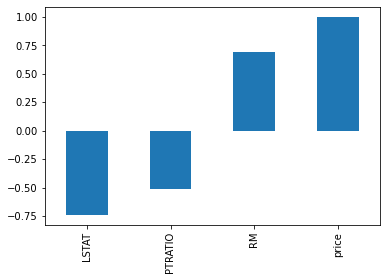

In [240]:
#画出相关系数>0.5特征
corr = data_pd.corr()
corr = corr['price']
corr[abs(corr)>0.5].sort_values().plot.bar()

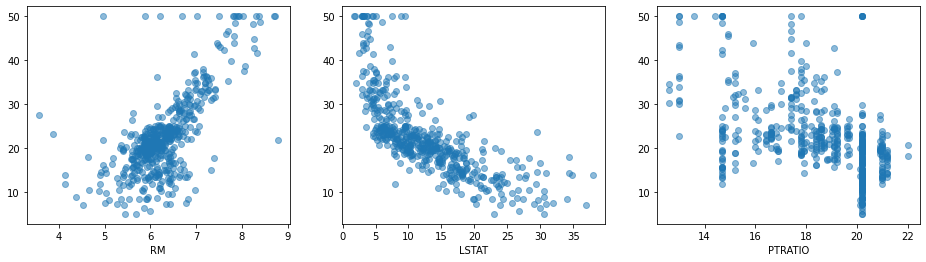

In [241]:
#各变量与价格之间关系
plt.figure(figsize=(16,4))
for i, key in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    plt.subplot(1, 3, i+1)
    plt.xlabel(key)
    plt.scatter(data_pd[key], data_pd['price'], alpha=0.5)
plt.show()


## Single variable prediction

In [242]:
# #单变量

def linear_single(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xsize = x.size
    zi = (x * y).sum() - xsize * x_mean *y_mean
    mu = (x ** 2).sum() - xsize * x_mean ** 2
    # 参数a b
    a = zi / mu
    b = y_mean - a * x_mean
    # 这里对参数保留两位有效数字
    a = np.around(a,decimals=2);
    b = np.around(b,decimals=2);
    return a,b

The weights:  9.1 -34.67
Linear_Single r2_score: 0.4835235394426868
Linear_Single MSE: 3547.0440507998883
Linear_Single MAE: 40.119537835043744


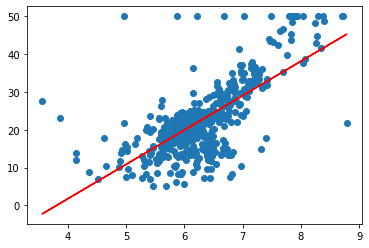

In [243]:

Y_single = np.array(data_pd['price'])

X_single = np.array(data_pd['RM'])

a,b=linear_single(X_single,Y_single);
y1 = a*X_single + b
plt.scatter(X_single,Y_single)
plt.plot(X_single,y1,c='r')
print('The weights: ',a,b)


from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#r2_score
print("Linear_Single r2_score:",r2_score(Y_single,y1));
#MSE
print("Linear_Single MSE:",mean_squared_error(ss_y.inverse_transform(Y_single),ss_y.inverse_transform(y1)));
#MAE
print("Linear_Single MAE:",mean_absolute_error(ss_y.inverse_transform(Y_single),ss_y.inverse_transform(y1)));

## Multi-variable prediction

In [245]:
# 制作训练集和测试集的数据
data_pd = data_pd[['LSTAT','PTRATIO','RM','price']]
y = np.array(data_pd['price'])
data_pd=data_pd.drop(['price'],axis=1)
X = np.array(data_pd)
# 分割训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [246]:

#2.数据标准化处理
from sklearn.preprocessing import StandardScaler
#分别初始化对特征和目标值的标准化器
ss_X=StandardScaler();
ss_y=StandardScaler();

#分别对训练和测试数据的特征以及目标值进行标准化处理
X_train=ss_X.fit_transform(X_train);
X_test=ss_X.transform(X_test);
y_train=ss_y.fit_transform(y_train.reshape(-1,1));
y_test=ss_y.transform(y_test.reshape(-1,1));

In [247]:
#使用线性回归模型LinearRegression和SGDRegressor分别对波士顿房价数据进行训练及预测
from sklearn.linear_model import LinearRegression
lr=LinearRegression();
#使用训练数据进行参数估计
lr.fit(X_train,y_train);
#回归预测
lr_y_predict=lr.predict(X_test);


### LinearRegression 

In [248]:
#模型评估
#使用LinearRegression模型自带的评估模块，并输出评估结果
print("lr_score:",lr.score(X_test,y_test));
#R-square,MSE,MAE评估LinearRegression回归性能
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#r2_score
print("r2_score:",r2_score(y_test,lr_y_predict));
#MSE
print("MSE:",mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(lr_y_predict)));
#MAE
print("MAE:",mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(lr_y_predict)));


lr_score: 0.6891839740632231
r2_score: 0.6891839740632231
MSE: 26.69298427128839
MAE: 3.8102303924910137


### SGDR 

In [249]:
#SGDRegressor
from sklearn.linear_model import SGDRegressor
#默认配置初始化线性回归器
sgdr=SGDRegressor();
#使用训练数据进行参数估计
sgdr.fit(X_train,y_train);
#对测试数据进行回归预测
sgdr_y_predict=sgdr.predict(X_test);

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [250]:
#使用SGDRegressor模型自带的评估模块，并输出评估结果
print("sgdr_score:",sgdr.score(X_test,y_test));
#R-square,MSE,MAE评估SGDRegressor回归性能
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#r2_score
print("r2_score:",r2_score(y_test,sgdr_y_predict));
#MSE
print("MSE:",mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(sgdr_y_predict)));
#MAE
print("MAE:",mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(sgdr_y_predict)));

sgdr_score: 0.68745548999423
r2_score: 0.68745548999423
MSE: 26.841427061288496
MAE: 3.820845071511231


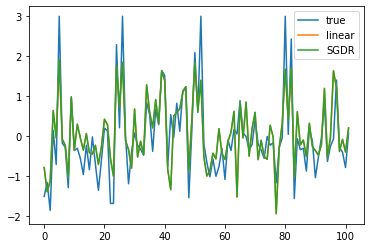

In [251]:
#绘图
import matplotlib.pyplot as plt
#Linear
plt.plot(y_test, label='true');
plt.plot(lr_y_predict, label='linear');
plt.legend();


#SGD

plt.plot(sgdr_y_predict, label='SGDR');
plt.legend();

plt.show();

### Ridge and lasso

In [253]:
#Ridge and lasso
from sklearn.linear_model import Ridge  # 线性回归算法Ridge回归，岭回归
from sklearn.linear_model import Lasso  # 线性回归算法Lasso回归，可用作特征筛选
# 创建学习模型
ridge = Ridge()
lasso = Lasso()


# 训练模型

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso()

In [254]:

# 预测数据
y_pre_ridge = ridge.predict(X_test)
y_pre_lasso = lasso.predict(X_test)

In [255]:

# 评分，R2 决定系数（拟合优度）。模型越好：r2→1；模型越差：r2→0

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#r2_score of Ridge
print("The Ridge r2_score:",r2_score(y_test,y_pre_ridge));
#MSE
print("The Ridge MSE:",mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_pre_ridge)));
#MAE
print("The Ridge MAE:",mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_pre_ridge)));

#r2_score of Lasso
print("The Lasso r2_score:",r2_score(y_test,y_pre_lasso));
#MSE
print("The Lasso MSE:",mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_pre_lasso)));
#MAE
print("The Lasso MAE:",mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_pre_lasso)));

The Ridge r2_score: 0.6891164493601986
The Ridge MSE: 26.698783315370246
The Ridge MAE: 3.8106009383404946
The Lasso r2_score: -0.0014914526044753629
The Lasso MSE: 86.00842093527935
The Lasso MAE: 6.568122694622402


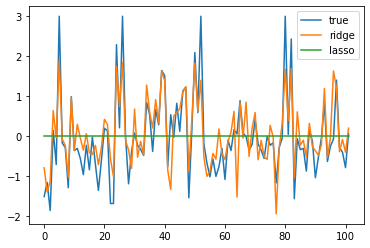

In [256]:
# 绘图

# Ridge
plt.plot(y_test, label='true')
plt.plot(y_pre_ridge, label='ridge')
plt.legend()
 
# Lasso
plt.plot(y_pre_lasso, label='lasso')
plt.legend()
 
plt.show()